# INTRODUCCIÓN A LOS CIRCUITOS CUÁNTICOS
### PRIMER CIRCUITO

En este apartado vamos a ver el concepto de superposición mediante puerta de Hadamard y el concepto de entrelazamiento mediante una puerta CNOT. Vamos también a aprender a dibujar circuitos y a simularlos

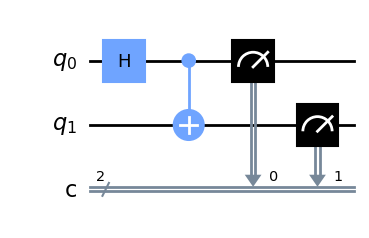

In [35]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2,2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
qc.measure([0,1],[0,1])
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")


El simulador por defecto es el AerSimulator. Para correr un circuito de forma óptima sobre un backend (simulador o real) tenemos que transpilar el circuito antes de ejecutar.

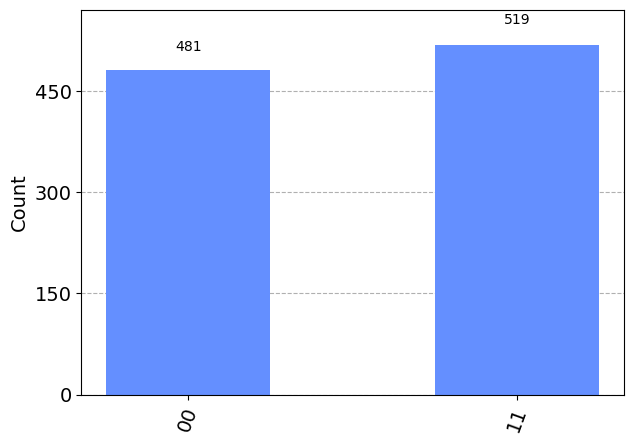

In [37]:
simulator=AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

### OPCIONAL: GENERAR UN MODELO DE RUIDO CUÁNTICO BASADO EN UN HW REAL


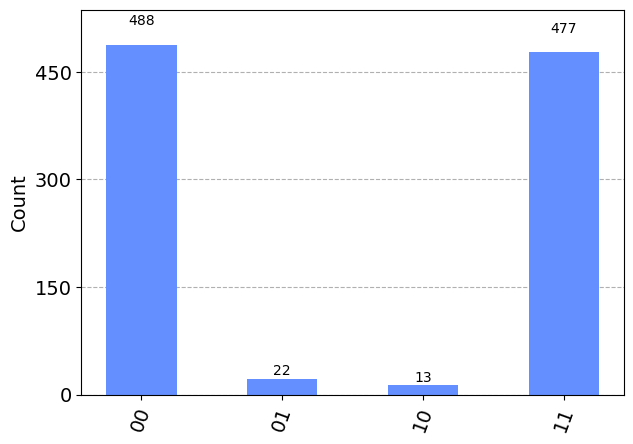

In [106]:
from qiskit_ibm_runtime import Estimator, Sampler, Session
from qiskit_ibm_runtime import QiskitRuntimeService

# Add your token below
service = QiskitRuntimeService(channel='ibm_quantum',token=token)
backend = service.get_backend('ibm_brisbane')
noise_model=NoiseModel.from_backend(backend)

simulator=AerSimulator(noise_model=noise_model)
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)


## PUERTAS QUE VAMOS A USAR:
Teniendo en cuenta que |𝜓⟩=𝛼|0⟩+𝛽|1⟩\
X cambia los valores de 𝛼 y 𝛽: X(|𝜓⟩)=𝛼|1⟩+𝛽|0⟩\
Z niega el valor de 𝛽: Z(|𝜓⟩)=𝛼|0⟩-𝛽|1⟩

In [133]:
from qiskit.circuit.library import XGate,ZGate,HGate,RGate,CXGate
gate = XGate()
print(gate.to_matrix())  
print()
gate = ZGate()
print(gate.to_matrix())  
print()
gate = HGate()
print(gate.to_matrix())  
print()
gate = CXGate()
print(gate.to_matrix())  


[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


# PRIMER CIRCUITO: TELEPORTACIÓN

Alice y Bob comparten 2 qubits entrelazados. Alice le quiere mandar el estado de un tercer qubit a Bob |𝜓⟩=𝛼|0⟩+𝛽|1⟩.\
Para crear los qubits entrelazados:\
Partimos de |χ⟩=|00⟩\
Aplicamos Hadamard sobre el qubit 0:\
|χ⟩=$\frac{1}{\sqrt{2}}$(|00⟩+|10⟩\
Aplicamos CNOT:\
|χ⟩=$\frac{1}{\sqrt{2}}$(|00⟩+|11⟩



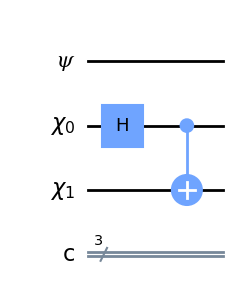

In [122]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qr = QuantumRegister(1,name='𝜓')
qr1 = QuantumRegister(2,name='χ')
cr = ClassicalRegister(3,name='c')
teleportation_circuit = QuantumCircuit(qr,qr1,cr)
def entanglement_bell_pair(qc, a, b):
    
    qc.h(a) # Put qubit a into state |+> or |-> using hadamard gate
    qc.cx(a,b) # CNOT with a as control and b as target

#  Eve entangles qubits q1 and q2

entanglement_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw(output='mpl')

### Entrelazamos el primer qubit con el sistema entrelazado
Si tenemos en cuenta el estado en este momento del sistema de 3 qubits:\
|λ⟩=|𝜓⟩ $\otimes$ |χ⟩ = (𝛼|0⟩+𝛽|1⟩) $\otimes$ $\frac{(|00⟩+|11⟩}{\sqrt{2}}$ \
$\frac{(𝛼(|000⟩+|011⟩)+𝛽(|100⟩+|111⟩)}{\sqrt{2}}$ \
Aplicamos CNOT a los 2 primeros qubits \
$\frac{(𝛼(|000⟩+|011⟩)+𝛽(|110⟩+|101⟩)}{\sqrt{2}}$ \
Y aplicamos Hadamard al primer qubit \
H|0⟩= $\frac{|0⟩+|1⟩}{\sqrt{2}}$ ; H|1⟩= $\frac{|0⟩-|1⟩}{\sqrt{2}}$ \
\
|λ⟩=$\frac{(𝛼(|0⟩(|00⟩+|11⟩)+𝛽|1⟩(|10⟩+|01⟩)}{\sqrt{2}}$\
|λ⟩=$𝛼(\frac{|0⟩+|1⟩}{\sqrt{2}})(\frac{|00⟩+|11⟩}{\sqrt{2}}) + 𝛽(\frac{|0⟩-|1⟩}{\sqrt{2}})(\frac{|10⟩+|01⟩}{\sqrt{2}})$



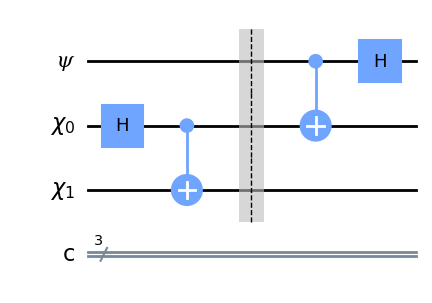

In [123]:
def alice_state_qubits(qc, psi, a):
    qc.cx(psi, a) #psi is the state of q0
    qc.h(psi)
    
# call the function to our circuit
teleportation_circuit.barrier()
alice_state_qubits(teleportation_circuit, 0, 1)
teleportation_circuit.draw(output='mpl')

### MEDICIÓN DE LOS 2 QUBITS DE ALICE
Agrupamos el resultado anterior usando los 2 primeros qubits como factor común\
|λ⟩=$\frac{1}{2}[|00⟩(𝛼(|0⟩+𝛽|1⟩) + |01⟩(𝛼(|1⟩+𝛽|0⟩) + |10⟩(𝛼(|0⟩-𝛽|1⟩) + |11⟩(𝛼(|1⟩-𝛽|0⟩) $



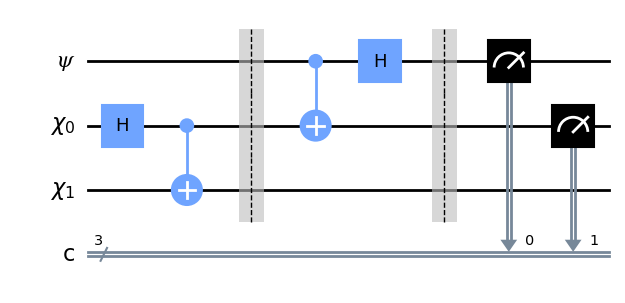

In [124]:
def measure_classical_send(qc, a, b):
    
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

measure_classical_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw(output='mpl')

## ROTACIÓN Y MEDICIÓN FINAL

|MEDICIÓN|VALOR DEL QUBIT DE BOB|APLICA X|APLICA Z|VALOR FINAL DEL QUBIT DE BOB|
|--------|----------------------|--------|--------|----------------------------|
| 00 | 𝛼\|0⟩+𝛽\|1⟩ |  NO     |   NO   |    𝛼\|0⟩+𝛽\|1⟩              |
| 01 | 𝛼\|1⟩+𝛽\|0⟩ |  SI     |   NO   |    𝛼\|0⟩+𝛽\|1⟩              |
| 10 | 𝛼\|0⟩-𝛽\|1⟩ |  NO     |   SI   |    𝛼\|0⟩+𝛽\|1⟩              |
| 11 | 𝛼\|1⟩-𝛽\|0⟩ |  SI     |   SI   |    𝛼\|0⟩+𝛽\|1⟩              |


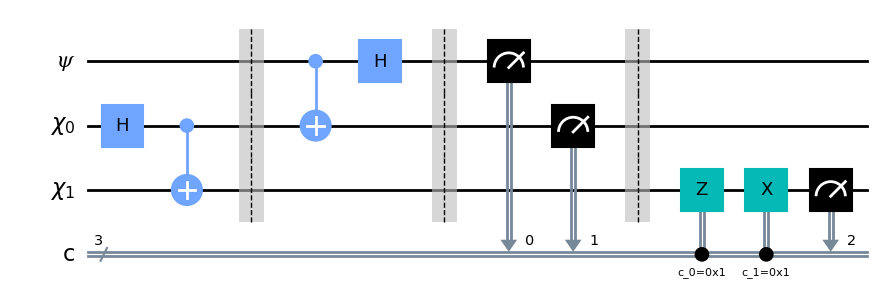

In [125]:
#based on cr1 and cr2 which store the classical bits
def bob_apply_gates(qc, qubit, cr):

    qc.z(qubit).c_if(cr[0], 1)  #if cr1 is 1 apply Z gate
    qc.x(qubit).c_if(cr[1], 1) #if cr2 is 1 apply x gate, look at table above
    
# Let's apply this to our circuit:
teleportation_circuit.barrier() # Use barrier to separate steps
bob_apply_gates(teleportation_circuit, 2, cr)
teleportation_circuit.measure(2,2)
teleportation_circuit.draw(output='mpl')

## COMPROBACIÓN
Vamos a realizar una rotación aleatoria sobre el qubit 0 para que los resultados no sean siempre 0.\

Vamos a crear una puerta con una rotación aleatoria sobre el eje X y perpendicular sobre el eje Z para no tener números complejos.\

Medimos la distribución de probabilidad de esa puerta

[[ 0.40848744+0.00000000e+00j -0.91276394-5.58906719e-17j]
 [ 0.91276394-5.58906719e-17j  0.40848744+0.00000000e+00j]]


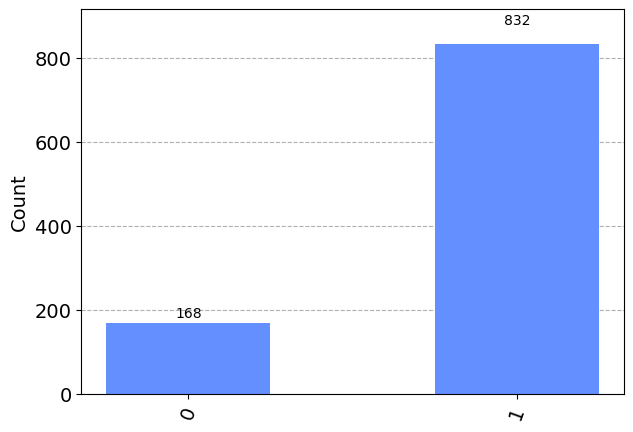

In [126]:
import math
from qiskit.circuit.library import RGate
init_gate = RGate(2.3,math.pi/2)
print(init_gate.to_matrix())   

r_qc=QuantumCircuit(1,1)
r_qc.append(init_gate,[0])
r_qc.measure(0,0)
            
simulator=AerSimulator()
compiled_circuit = transpile(r_qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(r_qc)
plot_histogram(counts)


## CREAMOS EL CIRCUITO CON LA ROTACIÓN EN EL QUBIT A TELETRANSPORTAR

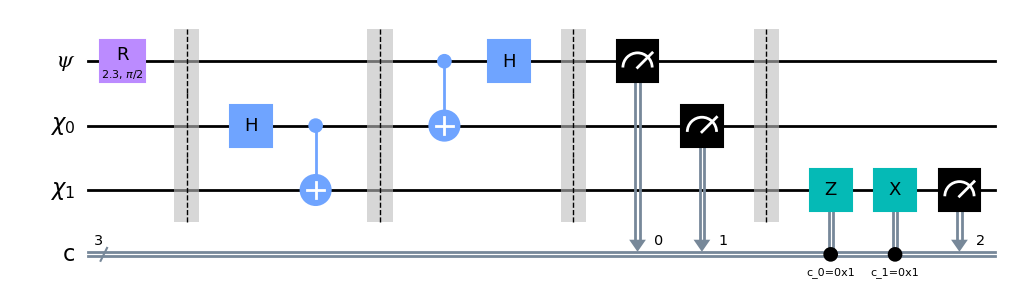

In [127]:
qr = QuantumRegister(1,name='𝜓')
qr1 = QuantumRegister(2,name='χ')
cr = ClassicalRegister(3,name='c')
new_circuit = QuantumCircuit(qr,qr1,cr)
new_circuit.append(init_gate,[0])
new_circuit.barrier()
teleportation_circuit=new_circuit.compose(teleportation_circuit)
teleportation_circuit.draw(output='mpl')

## TERMINAMOS MIDIENDO EL RESULTADO DEL CIRCUITO

En Qiskit los bits se muestran de mayor a menor en el resultado (C2,C1,C0).\
Como solamente nos interesa el C2 (medición del qubit teletransportado) agrupamos por el primer valor de la cadena

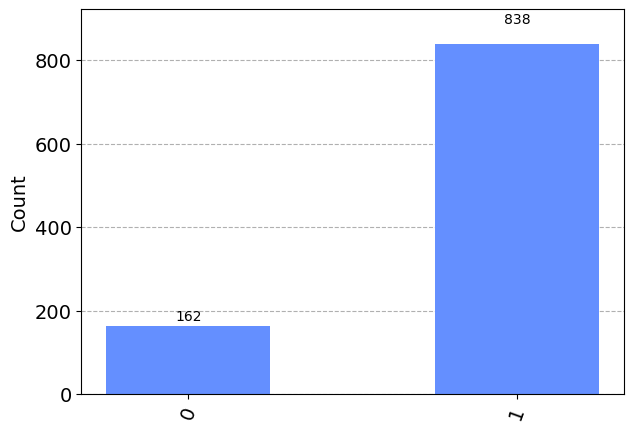

In [131]:
simulator=AerSimulator()
compiled_circuit = transpile(teleportation_circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(teleportation_circuit)
new_counts={}
new_counts['0']=counts['000']+counts['001']+counts['010']+counts['011']
new_counts['1']=counts['100']+counts['101']+counts['110']+counts['111']
plot_histogram(new_counts)


# CÓDIGO PaRA MANDAR EL CIRCUITO A UNA MÁQUINA REAL.

Tarda tiempo en ejecutar por las colas de IBM que suelen ser de varias horas/días

In [135]:
from qiskit_ibm_runtime import Estimator, Sampler, Session,Options
from qiskit_ibm_runtime import QiskitRuntimeService

# Add your token below
service = QiskitRuntimeService(channel='ibm_quantum',token=token)
backend = service.get_backend('ibm_brisbane')
options = Options(optimization_level=1)
session=Session(service,backend)
sampler=Sampler(session=session,options=options)
compiled_circuit = transpile(teleportation_circuit, simulator)
job = sampler.run(compiled_circuit, shots=1000)
print(job.result())